### Transformata Hougha w przestrzeni ab - Domowe
Przestrzeń ρ,θ nie jest jedyną przestrzenią w której punkt odpowiada parametrom prostej. Np. można spróbować wykorzystać tradycyjne równanie prostej:

y=ax+b

W tej przestrzeni reprezentacją pęku prostych jest prosta. 

Zadanie: napisać funkcję, która jako argument przyjmuje obraz (binarny) oraz parametry:

- aMin - minimalna wartość parametru a
- aMax - maksymalna  wartość parametru a
- aSkok - skok parametru a
- bMin - minimalna wartość parametru b
- bMax  - maksymalna  wartość parametru b
- bSkok - skok parametru b
Jako wynik ma zwrócić macierz przestrzeni Hougha ab.

Uwagi:

- zadanie może wyglądać na skomplikowane ale tak na prawdę wymaga tylko starannego przemyślenia
- najważniejszy jest problem "adresowania" macierzy H. Można do tego wykorzystać dwa wektory A i B ze wszystkimi możliwymi wartościami jakie parametry a i b mogę przyjąć (w podanych zakresach z podanym skokiem). Wówczas indeksy tych wektorów będą współrzędnymi w macierzy H. Do stworzenia wektorów wykorzystaj funkcję _np.arange_
- na podstawie rozmiaru wektorów A i B (własność _shape_) należy stworzyć wyzerowaną macierz H (funkcja _np.zeros_) 
- dla każdego punktu krawędzi na obrazie należy:
    - używająć wektora A dla każdej z jego wartości a obliczyć odpowiednią wartość b - indeksy kolejnych wartości a (a_idx) będą jedną z współrzędnych macierzy H, natomiast drugą współrędną mozna uzyskać jako b_idx = np.argmin(abs(B - b)).
        - każde a_idx i b_idx wyznaczą punkt w macierzy H, który należy zinkrementować
- działanie funkcji należy przetestować na punktach generowanych w 'edytorku' z punktu "Transformacja Hougha dla małej liczby punktów". Proponowane parametry funkcji:
    - aMin: -5
    - aMax:  5
    - aSkok: 0.05 
    - bMin: -100
    - bMax:  100
    - bSkok: 1

Zastanów się w przypadku jakich prostych reprezentacja ab nie sprawdzi się.

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks

In [2]:
def hough(image, aMin, aMax, aSkok, bMin, bMax, bSkok):
    A = np.arange(aMin, aMax, aSkok)
    B = np.arange(bMin, bMax, bSkok)
    H = np.zeros((A.size, B.size))
    
    def concurrent_lines(hx, wx):
        for a_idx, a in enumerate(A):
            b = hx - a * wx
            b_idx = np.argmin(abs(B - b))
            
            H[a_idx, b_idx] += 1
    
    for hx in range(image.shape[0]):
        for wx in range(image.shape[1]):
            if image[hx, wx] > 0:
                concurrent_lines(hx, wx)
                
    return H

In [3]:
def imread(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

In [4]:
def plot_img(img, cmap='gray', title=''):
    plt.figure(figsize=(16, 9))
    plt.imshow(img, cmap=cmap, vmin=0, vmax=255)
    plt.axis('off')
    plt.title(title)
    plt.show()

In [5]:
def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].axis('off')
    
    plt.tight_layout()
    plt.show()    

In [6]:
kw = imread('kwadraty-edges.png')

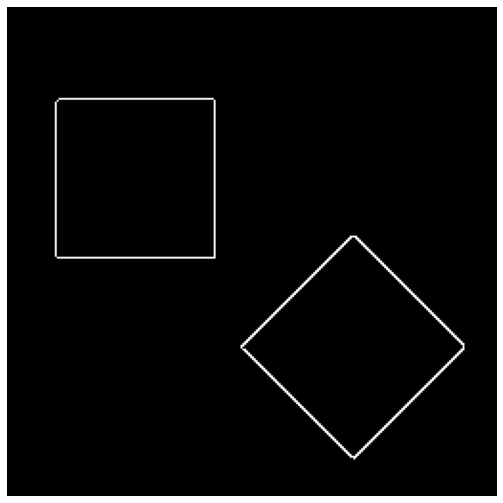

In [7]:
plot_img(kw)

In [8]:
H = hough(kw, -5, 5, 0.05, -100, 100, 1)

In [9]:
H

array([[  0.,   0.,   0., ...,   0.,   0., 790.],
       [  0.,   0.,   0., ...,   0.,   0., 790.],
       [  0.,   0.,   0., ...,   0.,   0., 790.],
       ...,
       [682.,   0.,   0., ...,   0.,   0.,   0.],
       [682.,   2.,   0., ...,   0.,   0.,   0.],
       [684.,   0.,   0., ...,   0.,   0.,   0.]])

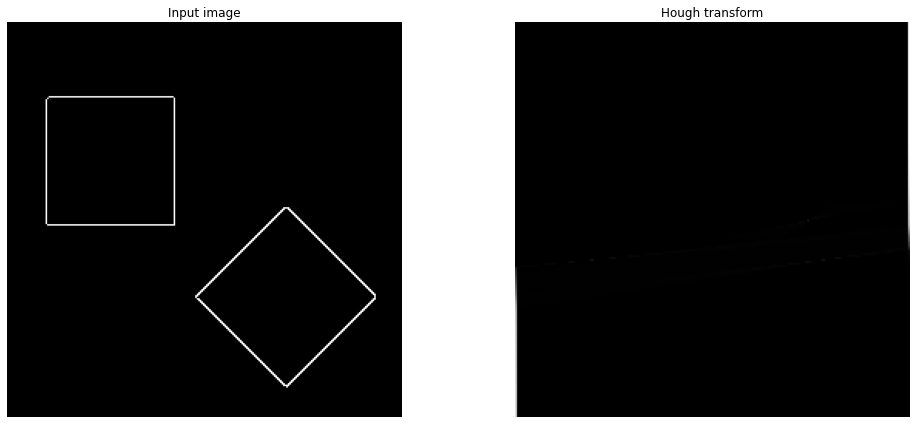

In [10]:
show_hough(H, kw)

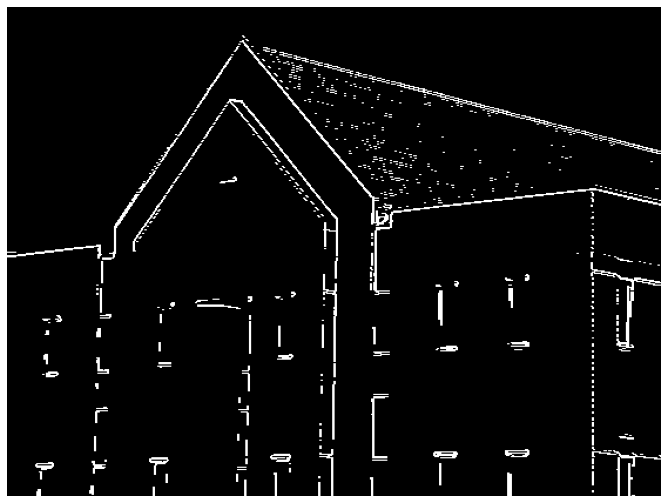

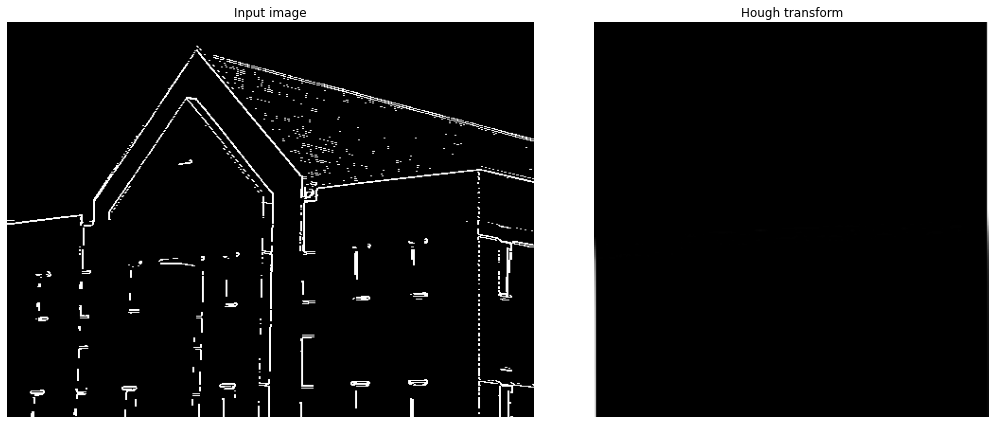

In [11]:
dom = imread('dom-edges.png')
plot_img(dom)

H = hough(dom, -5, 5, 0.05, -100, 100, 1)
show_hough(H, dom)

In [12]:
H

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        8.090e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        8.090e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        8.090e+03],
       ...,
       [7.507e+03, 2.000e+00, 3.000e+00, ..., 0.000e+00, 1.000e+00,
        2.520e+02],
       [7.517e+03, 2.000e+00, 3.000e+00, ..., 1.000e+00, 1.000e+00,
        2.510e+02],
       [7.525e+03, 2.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        2.500e+02]])

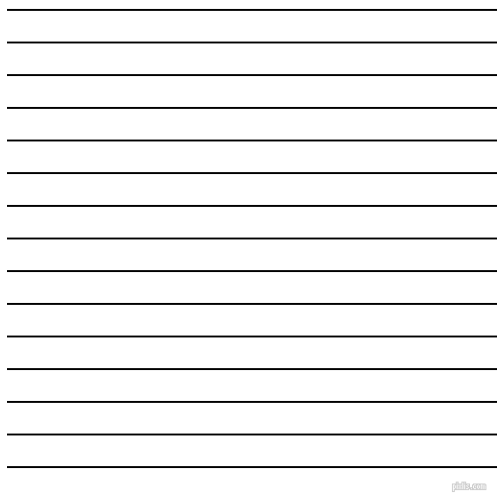

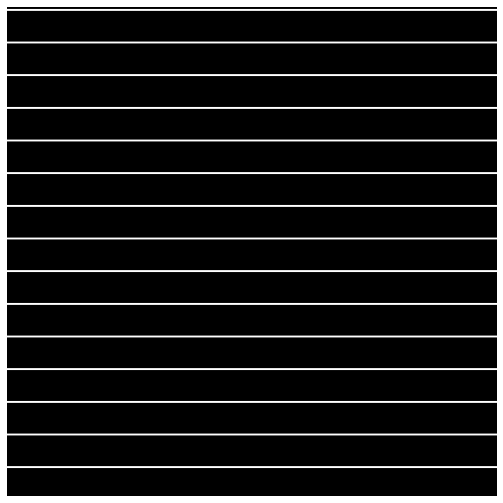

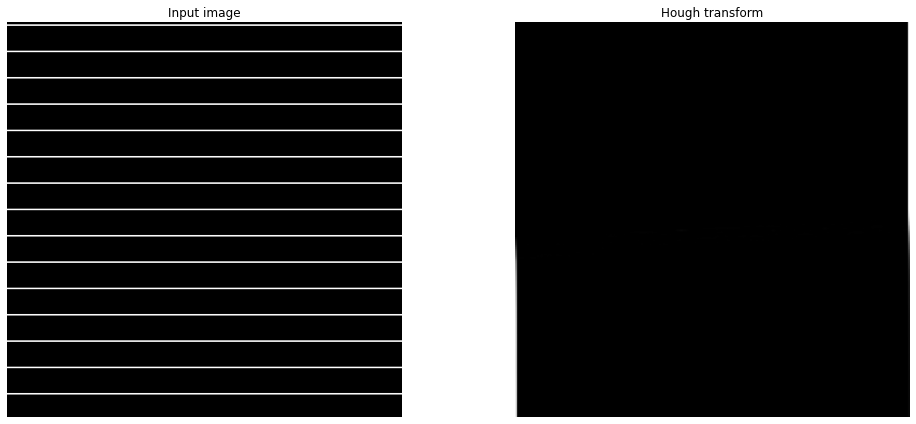

In [13]:
hor = imread('horizontalpng.png')
plot_img(hor)

_, hor = cv2.threshold(hor, 128, 255, cv2.THRESH_BINARY_INV)
plot_img(hor)

H = hough(dom, -5, 5, 0.05, -100, 100, 1)
show_hough(H, hor)

In [14]:
H

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        8.090e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        8.090e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        8.090e+03],
       ...,
       [7.507e+03, 2.000e+00, 3.000e+00, ..., 0.000e+00, 1.000e+00,
        2.520e+02],
       [7.517e+03, 2.000e+00, 3.000e+00, ..., 1.000e+00, 1.000e+00,
        2.510e+02],
       [7.525e+03, 2.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        2.500e+02]])

In [22]:
A = np.zeros((100, 100))
A[50, 50] = 255
A[20, 50] = 255

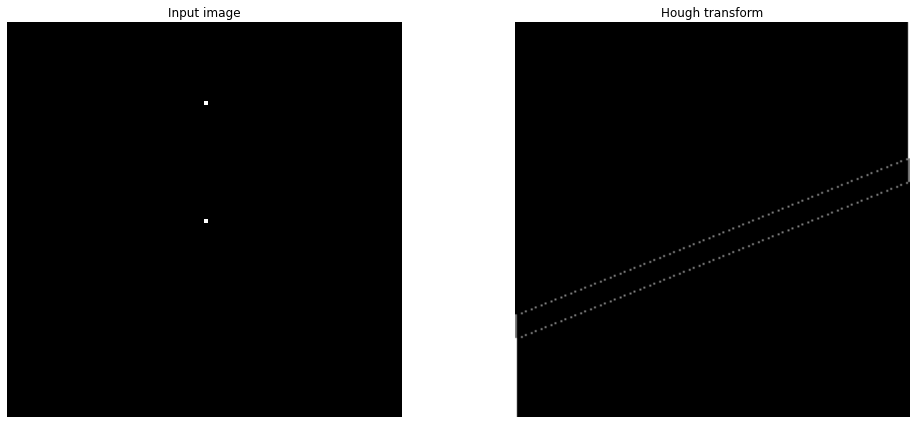

In [23]:
H = hough(A, -5, 5, 0.05, -100, 100, 1)
show_hough(H, A)